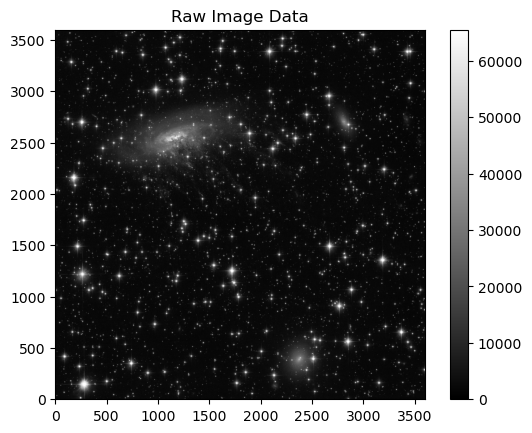

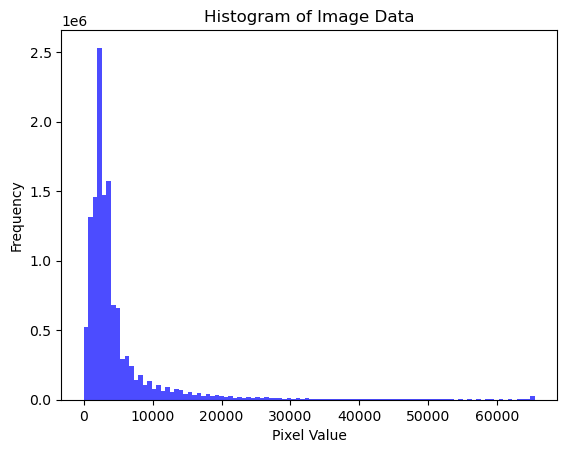

0.34388049021672334
Selected stretch type: linear
0.07000000000000013


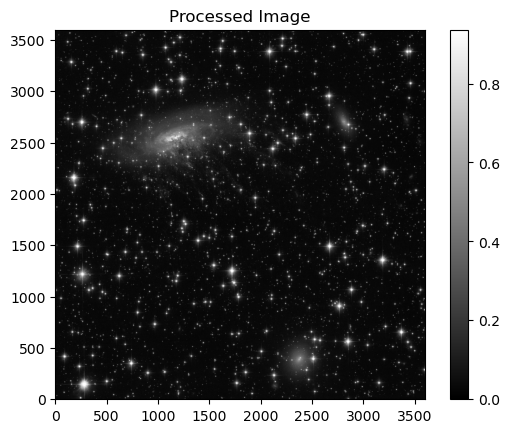

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import (LogStretch, AsinhStretch, SinhStretch, LinearStretch, ImageNormalize)
from astropy.visualization import ZScaleInterval
from skimage import exposure

def visualize_raw_image(data):
    plt.figure()
    plt.imshow(data, cmap='gray', origin='lower')
    plt.colorbar()
    plt.title("Raw Image Data")
    plt.show()

# Step 2: Examine the histogram of the image
def plot_histogram(data):
    plt.figure()
    plt.hist(data.flatten(), bins=100, range=(np.min(data), np.max(data)), color='blue', alpha=0.7)
    plt.title("Histogram of Image Data")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()


# Adjusted normalize_image function to accept percentile_clip
def normalize_image(data, stretch_type='linear', percentile_clip=(1, 99)):
    if stretch_type == 'log':
        stretch = LogStretch()
    elif stretch_type == 'asinh':
        stretch = AsinhStretch()
    elif stretch_type == 'sinh':
        stretch = SinhStretch()
    else:
        stretch = LinearStretch()

    interval = ZScaleInterval()
    vmin, vmax = interval.get_limits(data)

    # Clip the data at the specified percentiles to avoid extreme brightness
    lower_percentile, upper_percentile = np.percentile(data, percentile_clip)
    vmin = max(vmin, lower_percentile)
    vmax = min(vmax, upper_percentile)
    
    norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=stretch)
    normalized_data = norm(data)

    return normalized_data

def process_fits_image(fits_file, target_mean_range=(0.07, 0.071), percentile_clip=(1, 99)):
    with fits.open(fits_file) as hdul:
        data = hdul[0].data
        if data is None:
            data = hdul[1].data

            
    visualize_raw_image(data)
    plot_histogram(data)

    # Normalize and adjust contrast using CLAHE
    #data_clahe = exposure.equalize_adapthist(data, clip_limit=0.03)

    stretch_types = ['log', 'linear', 'asinh', 'sinh']
    best_image = None
    best_stretch = None
    best_mean_diff = float('inf')
    ctr = 0

    for stretch_type in stretch_types:
        normalized_data = normalize_image(data, stretch_type, percentile_clip)
        mean_value = np.mean(normalized_data)
        mean_diff = abs(mean_value - np.mean(target_mean_range))
        
        if target_mean_range[0] <= mean_value <= target_mean_range[1]:
            best_image = normalized_data
            best_stretch = stretch_type
            ctr = 1
            break
        elif mean_diff < best_mean_diff:
            best_mean_diff = mean_diff
            best_image = normalized_data
            best_stretch = stretch_type
    
    if best_image is not None:
        if ctr == 1:
            mean_value = np.mean(best_image)
            std_dev = np.std(best_image)
            vmin = max(mean_value - 1 * std_dev, 0)
            vmax = min(mean_value + 1 * std_dev, 1)
            data_adjusted = np.clip(best_image, vmin, vmax)
            data_adjusted = np.maximum(data_adjusted - vmin , 0)

        else:
            print(np.mean(best_image))
            data_adjusted  = best_image*(target_mean_range[0]/np.mean(best_image))
            data_adjusted = np.clip(data_adjusted, 0, 1)
        
    else:
        data_adjusted = best_image

#    if(ctr == 0):
#        data_adjusted  = data_adjusted*(target_mean_range[0]/np.mean(data_adjusted))

    print(f"Selected stretch type: {best_stretch}")
    print(np.mean(data_adjusted))

    return data_adjusted

# Example usage:
fits_file = 'new\eso137_optical_G.fits'  # Update with your FITS file path
processed_image = process_fits_image(fits_file)

# Display the processed image
plt.imshow(processed_image, cmap='gray', origin='lower')
plt.title("Processed Image")
plt.colorbar()
plt.show()



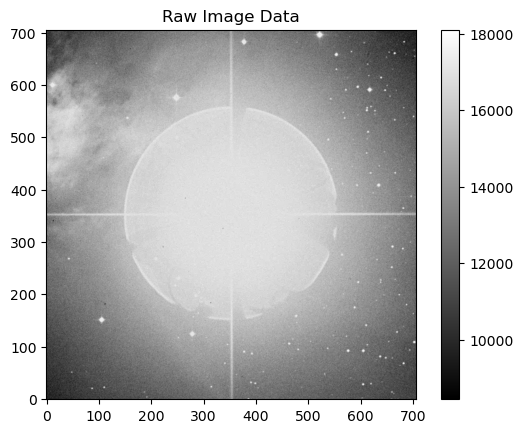

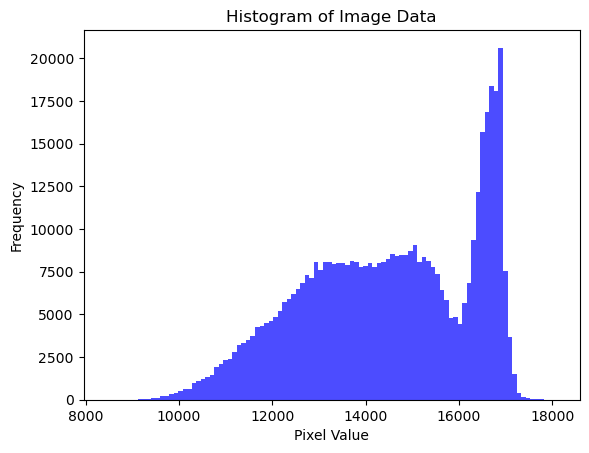

0.406058766814022
Selected stretch type: sinh
0.07002650171035706


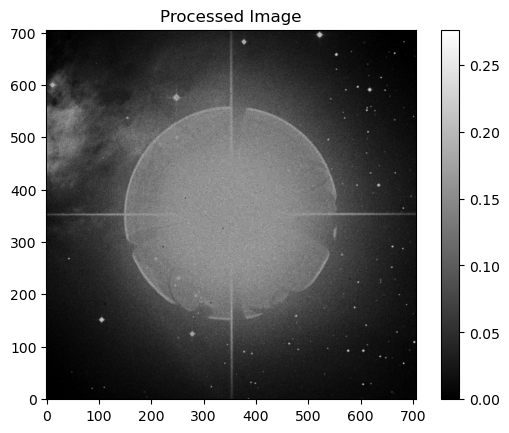

In [4]:
fits_file = 'data_1\stars\dss1.05.40.45.5-01.56.33.3.fits'  # Update with your FITS file path
processed_image = process_fits_image(fits_file)

# Display the processed image
plt.imshow(processed_image, cmap='gray', origin='lower')
plt.title("Processed Image")
plt.colorbar()
plt.show()

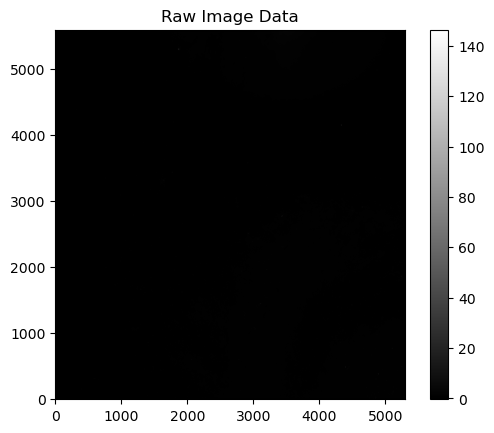

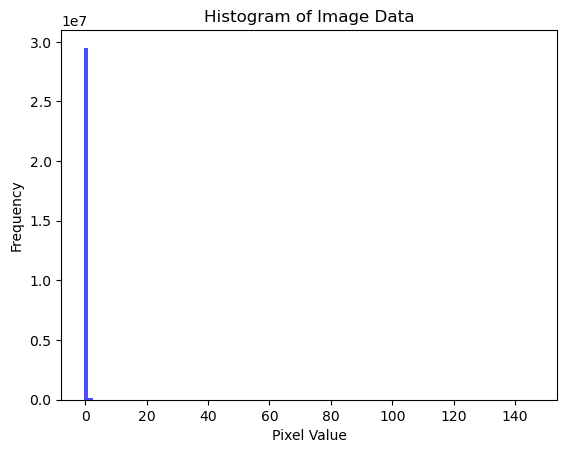

0.20889130212034437
Selected stretch type: linear
0.0696625391280287


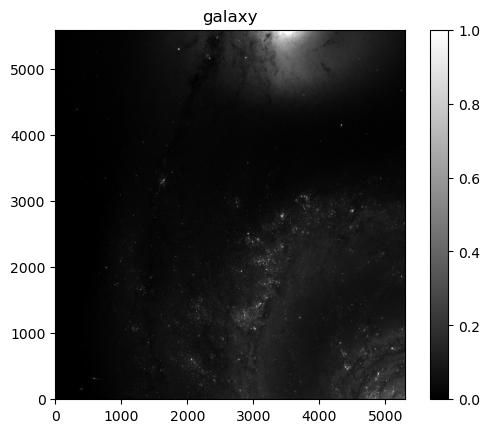

In [7]:
fits_file = 'data_1\galaxy\hlsp_legus_hst_acs_ngc5194-c_f814w_v1_drc_sci.fits'  # Assuming this is the FITS file path
processed_image = process_fits_image(fits_file)

# Display the processed image
plt.imshow(processed_image, cmap='gray', origin='lower')
plt.title("galaxy")
plt.colorbar()
plt.show()

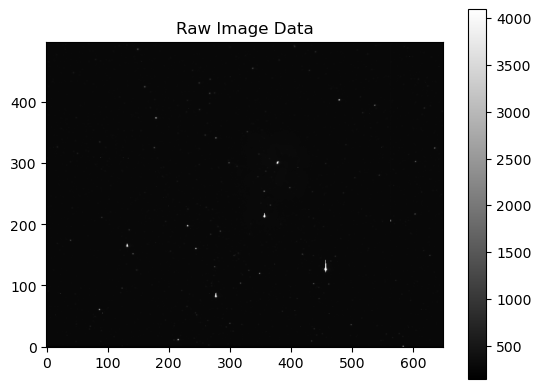

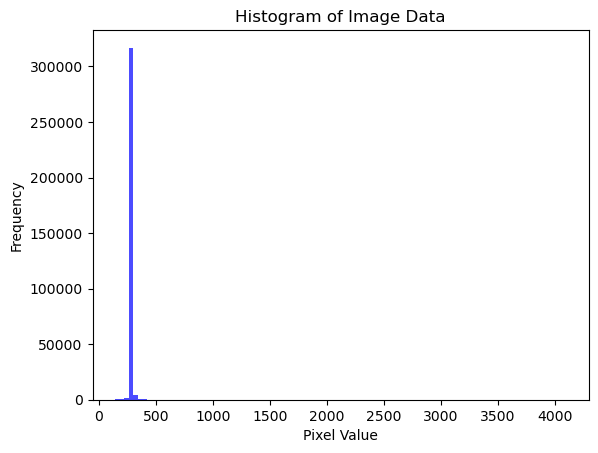

0.2836836420722135
Selected stretch type: linear
0.06347631207061051


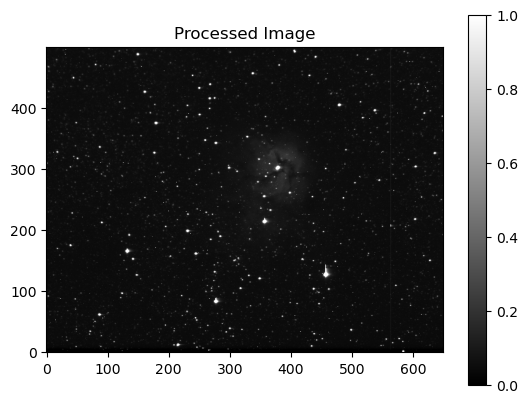

In [5]:
fits_file = 'TrifidNebula-MicroObservatoryFITS\TrifidNebula190821034705-red.FITS'  # Update with your FITS file path
processed_image = process_fits_image(fits_file)

# Display the processed image
plt.imshow(processed_image, cmap='gray', origin='lower')
plt.title("Processed Image")
plt.colorbar()
plt.show()